In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import WhatHappened as t
import seaborn as sns
from IPython import display
%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
dataframe = pd.read_csv('./survey_results_public.csv')
dataframe.shape

(19102, 154)

In [99]:
schema = pd.read_csv('./survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [100]:
dataframe.iloc[0]

Respondent                           1
Professional                   Student
ProgramHobby                 Yes, both
Country                  United States
University                          No
                             ...      
QuestionsInteresting    Strongly agree
QuestionsConfusing            Disagree
InterestedAnswers       Strongly agree
Salary                             NaN
ExpectedSalary                     NaN
Name: 0, Length: 154, dtype: object

In [120]:
i = 1
has_major_undergrad = False

for column, answer in dataframe.iloc[67].iteritems():
    
    if i <= 900:
        answer = str(answer).strip()
        if column == 'FormalEducation' and answer.strip() != 'Secondary school':
            has_major_undergrad = True
#             print('Has an major in under grad!!!')

        question = schema[schema['Column'] == column]['Question'].to_string(index=False)
        print('QUESTION #'+str(i)+'('+column+')')
        print('-------------------------------------------------------------------------------------------------------------------')
        print(question.strip())
        print()
        print(answer)
        print('-------------------------------------------------------------------------------------------------------------------')
        print()
        print()
        print()
        i+=1
    else:
        break

QUESTION #1(Respondent)
-------------------------------------------------------------------------------------------------------------------
Respondent ID number

68
-------------------------------------------------------------------------------------------------------------------



QUESTION #2(Professional)
-------------------------------------------------------------------------------------------------------------------
Which of the following best describes you?

Professional developer
-------------------------------------------------------------------------------------------------------------------



QUESTION #3(ProgramHobby)
-------------------------------------------------------------------------------------------------------------------
Do you program as a hobby or contribute to open source projects?

Yes, I program as a hobby
-------------------------------------------------------------------------------------------------------------------



QUESTION #4(Country)
--------------

How many Respondents took the survey? 

In [102]:
total_respondents = dataframe['FormalEducation'].count()
print("{:,} Respondents took the survey.".format(total_respondents))

19,102 Respondents took the survey.


How many Respondents didn't complete a formal education past Secondary School? 

In [103]:
total_respondents_not_past_sec = dataframe['FormalEducation'][dataframe['FormalEducation'] == 'Secondary school'].count()
print(f"{total:,} respondents didn't complete a formal education past Secondary School.")

2,227 respondents didn't complete a formal education past Secondary School.


What percentage of Respondents didn't complete a formal education past Secondary School? 

In [104]:
percentage = total_respondents_not_past_sec/total_respondents
print("{:.2%} of respondents didn't complete a formal education past Secondary School.".format(percentage))

11.66% of respondents didn't complete a formal education past Secondary School.


Is the total Respondents that didn't have a undergrad major equal to 2,227 (respondents didn't complete a formal education past Secondary School)? 

In [108]:
total_respondents_no_undergrad = dataframe['MajorUndergrad'][dataframe['MajorUndergrad'].isnull()].count()
print(f"The total respondents that didn't have an undergrad major is equal to {total:,}.")

The total respondents that didn't have an undergrad major is equal to 2,227.


In [117]:
print("{:,}".format(total_respondents - total_respondents_not_past_sec))

16,875


How much are data scientist making?

In [142]:
avg_data_sci_salary = dataframe[(dataframe['EmploymentStatus'] == 'Employed full-time') & (dataframe['Salary'].notnull()) & (dataframe['DeveloperType'].str.contains('Data scientist', na=False))]['Salary'].mean()
avg_data_sci_salary
print(f"The average data scientist salary is ${avg_data_sci_salary:,.2f}.")

The average data scientist salary is $67,227.02.


In [137]:
dataframe[(dataframe['EmploymentStatus'] == 'Employed full-time') & (dataframe['Salary'].notnull()) & (dataframe['DeveloperType'].str.contains('Data scientist', na=False))][['DeveloperType','CompanyType','HomeRemote','CompanySize','Salary','YearsProgram','YearsCodedJob','CareerSatisfaction']].sort_values('Salary')

,DeveloperType,CompanyType,HomeRemote,CompanySize,Salary,YearsProgram,YearsCodedJob,CareerSatisfaction
16772,Developer with a statistics or mathematics background; Data scientist; Database administrator,I prefer not to answer,Never,10 to 19 employees,385.873927,9 to 10 years,1 to 2 years,8.0
1512,Web developer; Data scientist; Systems administrator; DevOps specialist,"Privately-held limited company, not in startup mode","More than half, but not all, the time",20 to 99 employees,483.870968,7 to 8 years,1 to 2 years,10.0
15419,Web developer; Mobile developer; Graphics programming; Data scientist; Desktop applications developer,I prefer not to answer,"Less than half the time, but at least one day each week",100 to 499 employees,500.000000,12 to 13 years,9 to 10 years,5.0
12613,Data scientist,"Privately-held limited company, not in startup mode","More than half, but not all, the time",500 to 999 employees,700.000000,3 to 4 years,1 to 2 years,8.0
4747,Web developer; Mobile developer; Data scientist; Desktop applications developer,Government agency or public school/university,"Less than half the time, but at least one day each week","10,000 or more employees",964.187328,10 to 11 years,4 to 5 years,7.0
3258,Web developer; Mobile developer; Developer with a statistics or mathematics background; Data scientist; Graphic designer; Database administrator; Systems administrator,Government agency or public school/university,All or almost all the time (I'm full-time remote),10 to 19 employees,1114.649682,7 to 8 years,4 to 5 years,10.0
11846,Machine learning specialist; Data scientist,Venture-funded startup,Never,10 to 19 employees,1234.796567,10 to 11 years,3 to 4 years,8.0
16198,Developer with a statistics or mathematics background; Data scientist,"Privately-held limited company, not in startup mode",Never,"1,000 to 4,999 employees",1238.765432,10 to 11 years,3 to 4 years,3.0
2158,Web developer; Data scientist,"Privately-held limited company, not in startup mode",Never,Fewer than 10 employees,1550.000000,12 to 13 years,4 to 5 years,10.0
14114,Web developer; Data scientist,"Privately-held limited company, not in startup mode",Never,"1,000 to 4,999 employees",1908.677140,8 to 9 years,1 to 2 years,6.0


array([[<AxesSubplot:title={'center':'Respondent'}>,
        <AxesSubplot:title={'center':'CareerSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'HoursPerWeek'}>,
        <AxesSubplot:title={'center':'StackOverflowSatisfaction'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'ExpectedSalary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

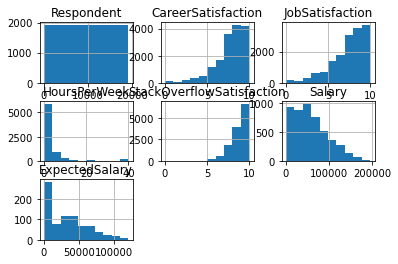

In [143]:
dataframe.hist()

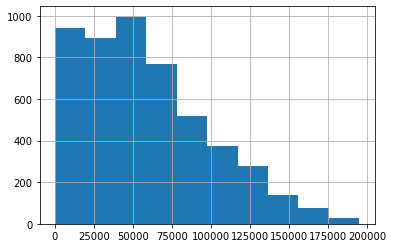

In [147]:
dataframe['Salary'].hist();

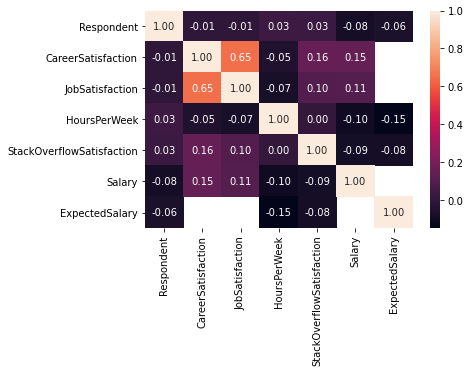

In [149]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");